In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.losses = []
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def _init_params(self, X):
        self.weights = np.zeros(X.shape[1])
    
    def compute_gradients(self, X, y, predictions):
        diff = y - predictions
        dm = -2*(np.dot(X.T, diff).mean())
        db = -2*diff.mean()
        return dm, db

    def compute_loss(self, y_true, y_pred):
        return np.sum((y_true-y_pred)**2).mean()
    
    def _update_params(self, dm, db):
        self.weights -= self.lr * dm
        self.bias -= self.lr * db
    
    def fit(self, X, y):
        self._init_params(X)
        for epoch in range(self.epochs):
            pred = self.predict(X)
            loss = self.compute_loss(y, pred)
            dm, db = self.compute_gradients(X, y, pred)
            self._update_params(dm, db)

            self.losses.append(loss)

In [3]:
from sklearn import datasets

In [4]:
X, y = datasets.load_diabetes(return_X_y=True)
X = X[:, np.newaxis, 2] # we want only one feature

X_train = X[:-20]
X_test = X[-20:]

y_train = y[:-20]
y_test = y[-20:]

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

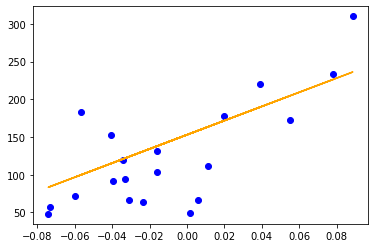

In [14]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predictions, color='orange')

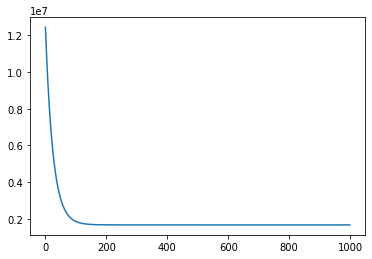

In [6]:
plt.plot(range(0, model.epochs), model.losses)